In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import os
import dotenv
import os
import tifffile
import deepmars.utils
from deepmars.utils.transform import pix2coord
import deepmars.features.template_match_target as tmt
import cartopy.crs as ccrs
import cartopy.img_transform as cimg
project_dir = os.path.join(os.getcwd(), os.pardir)
dotenv_path = os.path.join(project_dir, '.env')
found = dotenv.load_dotenv(dotenv_path)
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

In [3]:
print("Loading MOLA")
mola = tifffile.imread(os.path.join(os.getenv("DM_MarsDEM")))
mola = mola.T

Loading MOLA


In [4]:
print("Loading Robbins")
df = pd.read_table(os.path.join(os.getenv("DM_ROOTDIR"),"data/raw/RobbinsCraters_20121016.tsv"), sep='\t',engine='python')
#df = pd.read_table(os.path.join(os.getenv("DM_ROOTDIR"),"data/raw/RobbinsCraters_small.tsv"), sep=',',engine='python')

Loading Robbins


In [5]:
rawlen = int(256*10**(.5+np.random.random()))
loc = [np.random.randint(mola.shape[0]),np.random.randint(mola.shape[1])]
print(rawlen,loc)

4995 [92002, 49437]


In [6]:
box = np.array([22509, 32609,36422 , 46522])
sp = np.array([mola.shape[0], mola.shape[0], mola.shape[1], mola.shape[1]])
gbox = np.array([-180,180,-90,90])
origin = np.array([gbox[0],gbox[0],gbox[3],gbox[3]])
delta = np.array([gbox[1]-gbox[0], gbox[1]-gbox[0],  - (gbox[3]-gbox[2]), -(gbox[3]-gbox[2])])

llbd = (box/sp) * delta + origin
print(llbd)
mymola = mola[box[0]:box[1],box[2]:box[3]].T
mymola = mymola[::10,::10]
pb = mymola.shape
pc_x,pc_y = pix2coord(np.arange(box[0],box[1],10),np.arange(box[2],box[3],10), gbox, mola.shape)
print(pc_x.min(), pc_x.max(),pc_y.min(), pc_y.max())
x2,y2 = np.meshgrid(pc_x,pc_y)

[-104.05158678  -69.97281947  -32.89275873  -66.97152605]
-104.05158678088739 -70.00656081879018 -66.9377846926725 -32.89275873057528


In [7]:
arad=3389.0
iglobe = ccrs.Globe(semimajor_axis=arad*1000.,
                            semiminor_axis=arad*1000., ellipse=None)

geoproj = ccrs.Geodetic(globe=iglobe)
iproj = ccrs.PlateCarree(globe=iglobe)
oproj = ccrs.Orthographic(central_longitude=np.mean(llbd[:2]),
                          central_latitude=np.mean(llbd[2:]),
                          globe=iglobe)


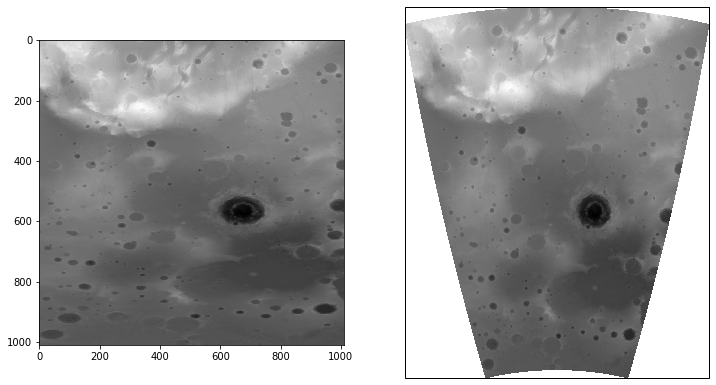

In [8]:
fig=plt.figure(figsize=(12,12))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122, projection=oproj)
ax1.imshow(mymola,cmap="Greys_r",origin="upper")

ix2,iy2= np.transpose(iproj.transform_points(geoproj,x2,y2)[...,:2],[2,0,1])
ax2.pcolormesh(ix2,iy2,mymola,transform=iproj,cmap="Greys_r")
plt.show()